# **Case Study on Aspiring Minds Employment Outcome 2015**

The dataset was released by Aspiring Minds from the Aspiring Minds Employment Outcome 2015 (AMEO). The study is primarily limited only to students with engineering disciplines. 
> * The dataset contains the employment outcomes of engineering graduates as dependent variables  (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills.
> * The dataset contains a unique identifier for each candidate.
> * The dataset also contains demographic features. 

Below mentioned table contains the details for the original dataset.


* **ID**  - A unique ID to identify a candidate
* **Salary** - Annual CTC offered to the candidate (in INR)
* **DOJ** - Date of joining the company
* **DOL** - Date of leaving the company
* **Designation** - Designation offered in the job
* **JobCity** - Location of the job (city)
* **Gender** - Candidate’s gender
* **DOB** - Date of birth of candidate
* **10percentage** - Overall marks obtained in grade 10 examinations
* **10board** - The school board whose curriculum the candidate followed in grade 10
* **12graduation** - Year of graduation - senior year high school
* **12percentage** - Overall marks obtained in grade 12 examinations
* **12board** - The school board whose curriculum the candidate followed in grade 12
* **CollegeID** - Unique ID identifying the college which the candidate
attended
* **CollegeTier** - Tier of college
* **Degree** - Degree obtained/pursued by the candidate
* **Specialization** - Specialization pursued by the candidate
* **CollegeGPA** - Aggregate GPA at graduation
* **CollegeCityID** - A unique ID to identify the city in which the college is located in
* **CollegeCityTier** - The tier of the city in which the college is located
* **CollegeState** - Name of States
* **GraduationYear** - Year of graduation (Bachelor’s degree)
* **English** - Scores in AMCAT English section
* **Logical** - Scores in AMCAT Logical section
* **Quant** - Scores in AMCAT Quantitative section
* **Domain** - Scores in AMCAT’s domain module
* **ComputerProgramming** - Score in AMCAT’s Computer programming section
* **ElectronicsAndSemicon** - Score in AMCAT’s Electronics & Semiconductor Engineering section
* **ComputerScience** - Score in AMCAT’s Computer Science section
* **MechanicalEngg**- Score in AMCAT’s Mechanical Engineering section
* **ElectricalEngg**- Score in AMCAT’s Electrical Engineering section
* **TelecomEngg** - Score in AMCAT’s Telecommunication Engineering section
* **CivilEngg** - Score in AMCAT’s Civil Engineering section
* **conscientiousness** - Scores in one of the sections of AMCAT’s
personality test
* **agreeableness** - Scores in one of the sections of AMCAT’s
personality test
* **extraversion** - Scores in one of the sections of AMCAT’s personality test
* **neuroticism** - Scores in one of the sections of AMCAT’s
personality test
* **openess_to_experience** - Scores in one of the sections of AMCAT’s
personality test

## **Problem Statement**
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
-	**Is there a relationship between gender and specialisation?** (i.e. Does the preference of Specialisation depend on the Gender?)

We will try to identify the characteristics of the Target Audience for each type of Specialization and Designation offered by the company based on their AMCAT Scores, to provide a Better Recommendation to the Future Audience.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')
df.head(3)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721


In [3]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 3998
Number of columns: 39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [5]:
df=df.drop(columns=['Unnamed: 0','ID'],axis=1)

In [6]:
for i in df.columns:
    print(i," - " ,df[i].nunique())

Salary  -  177
DOJ  -  81
DOL  -  67
Designation  -  419
JobCity  -  339
Gender  -  2
DOB  -  1872
10percentage  -  851
10board  -  275
12graduation  -  16
12percentage  -  801
12board  -  340
CollegeID  -  1350
CollegeTier  -  2
Degree  -  4
Specialization  -  46
collegeGPA  -  1282
CollegeCityID  -  1350
CollegeCityTier  -  2
CollegeState  -  26
GraduationYear  -  11
English  -  111
Logical  -  107
Quant  -  138
Domain  -  243
ComputerProgramming  -  79
ElectronicsAndSemicon  -  29
ComputerScience  -  20
MechanicalEngg  -  42
ElectricalEngg  -  31
TelecomEngg  -  26
CivilEngg  -  23
conscientiousness  -  141
agreeableness  -  149
extraversion  -  154
nueroticism  -  217
openess_to_experience  -  142


In [7]:
sorted(df['GraduationYear'].unique())

[0, 2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Salary,3998.0,307699.85,212737.50,35000.00,180000.00,300000.00,370000.00,4000000.00
10percentage,3998.0,77.93,9.85,43.00,71.68,79.15,85.67,97.76
12graduation,3998.0,2008.09,1.65,1995.00,2007.00,2008.00,2009.00,2013.00
12percentage,3998.0,74.47,11.00,40.00,66.00,74.40,82.60,98.70
CollegeID,3998.0,5156.85,4802.26,2.00,494.00,3879.00,8818.00,18409.00
CollegeTier,3998.0,1.93,0.26,1.00,2.00,2.00,2.00,2.00
collegeGPA,3998.0,71.49,8.17,6.45,66.41,71.72,76.33,99.93
CollegeCityID,3998.0,5156.85,4802.26,2.00,494.00,3879.00,8818.00,18409.00
CollegeCityTier,3998.0,0.30,0.46,0.00,0.00,0.00,1.00,1.00
GraduationYear,3998.0,2012.11,31.86,0.00,2012.00,2013.00,2014.00,2017.00


In [9]:
df.describe(include="object").T

,count,unique,top,freq
DOL,3998,67,present,1875
Designation,3998,419,software engineer,539
JobCity,3998,339,Bangalore,627
Gender,3998,2,m,3041
10board,3998,275,cbse,1395
12board,3998,340,cbse,1400
Degree,3998,4,B.Tech/B.E.,3700
Specialization,3998,46,electronics and communication engineering,880
CollegeState,3998,26,Uttar Pradesh,915


**Observations**

1. There are no missing values (null values )in the data. 
2. The Dataset comprises of the AMCAT exams held from year 2007 to 2017 , except for 2008.
3. A total of 46 Specializations are available for 3998 Students included in the Dataset, who have completed either of the Degrees : B.Tech/B.E. , MCA, M.Tech./M.E. , M.Sc. (Tech.)
4. A total of 418 unique Designations are designated among all students in 339 Cities or 26 States.
5. Number of Unique ID's identifying the college which the candidate attended is equal to the Number of Unique ID's to identify the city in which the college is located in.
6. Maximum Designations among all the Students in this Dataset is for Software Engineer (540).
7. Maximum number of Students have their Job City as Bangalore(627).
8. Majority of the Students are still working in their Respective Companies(1875).
9. Majority of the Students completed their Specialization in Electronics and Communication Engineering.

## **UNIVARIATE ANALYSIS**


**Gender**

Number of male candidates : 3041
Number of female candidates : 957
Male to Female ratio: 3.18


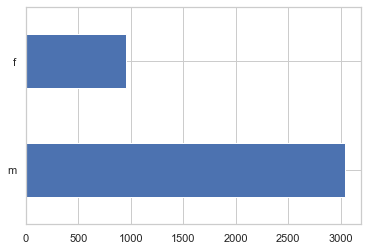

In [10]:
num_males = df['Gender'].where(df['Gender'] == 'm').count()
num_females = df['Gender'].where(df['Gender'] == 'f').count()
print('Number of male candidates : {}'.format(num_males))
print('Number of female candidates : {}'.format(num_females))
print('Male to Female ratio: {:.2f}'.format(num_males/num_females))
df["Gender"].value_counts().plot(kind="barh")
plt.show()

**Salary vs Gender**

In [11]:
df[['Salary', 'Gender']].groupby('Gender').describe().round(2)

Salary                                                               \
         count       mean        std      min       25%       50%       75%   
Gender                                                                        
f        957.0  294937.30  191031.79  35000.0  200000.0  300000.0  355000.0   
m       3041.0  311716.21  218999.54  35000.0  180000.0  300000.0  380000.0   

                   
              max  
Gender             
f       3500000.0  
m       4000000.0

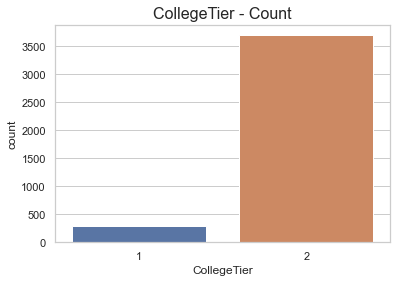

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
s = sns.countplot(data=df, x='CollegeTier')

s.set_title("CollegeTier - Count", fontsize=16)
plt.show()

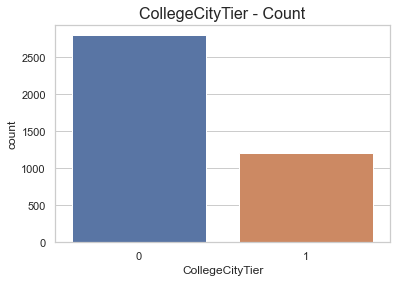

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
s = sns.countplot(data=df, x='CollegeCityTier')

s.set_title("CollegeCityTier - Count", fontsize=16)
plt.show()

In [14]:
df[['10percentage', '12percentage','12graduation', 'collegeGPA','Gender']].groupby('Gender').describe().round(2).T

Gender                    f        m
10percentage count   957.00  3041.00
             mean     80.93    76.98
             std       8.85     9.96
             min      48.80    43.00
             25%      75.00    70.66
             50%      82.40    78.00
             75%      87.63    85.00
             max      97.12    97.76
12percentage count   957.00  3041.00
             mean     77.01    73.67
             std      10.85    10.93
             min      43.12    40.00
             25%      69.16    65.20
             50%      77.00    73.40
             75%      85.60    81.80
             max      98.20    98.70
12graduation count   957.00  3041.00
             mean   2008.26  2008.03
             std       1.52     1.69
             min    2001.00  1995.00
             25%    2007.00  2007.00
             50%    2008.00  2008.00
             75%    2009.00  2009.00
             max    2013.00  2012.00
collegeGPA   count   957.00  3041.00
             mean     74.05    70.68
             std       7.27     8.27
             min       9.30     6.45
             25%      70.00    65.63
             50%      74.00    70.66
             75%      78.15    75.70
             max      99.93    98.40

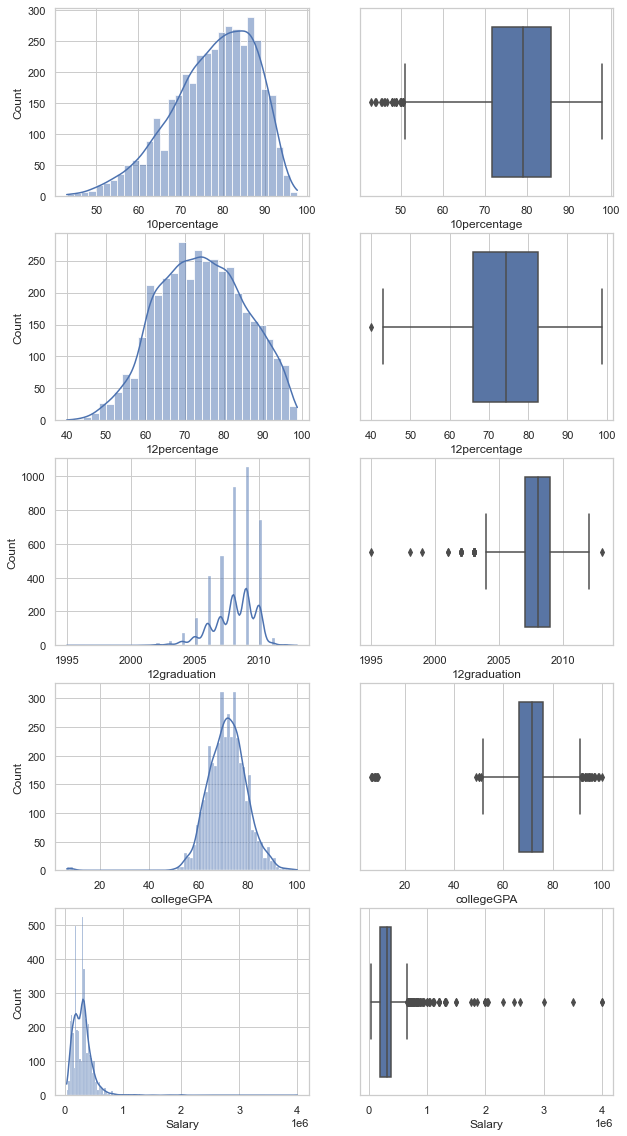

In [15]:
fig, axis = plt.subplots(nrows=5, ncols=2, figsize=(10,20))

sns.histplot(data=df, x="10percentage", kde=True, ax=axis[0,0])
sns.boxplot(data=df, x="10percentage", orient='h', ax=axis[0,1])

sns.histplot(data=df, x="12percentage", kde=True, ax=axis[1,0])
sns.boxplot(data=df, x="12percentage", orient='h', ax=axis[1,1])

sns.histplot(data=df, x="12graduation", kde=True, ax=axis[2,0])
sns.boxplot(data=df, x="12graduation", orient='h', ax=axis[2,1])

sns.histplot(data=df, x="collegeGPA", kde=True, ax=axis[3,0])
sns.boxplot(data=df, x="collegeGPA", orient='h', ax=axis[3,1])

sns.histplot(data=df, x="Salary", kde=True, ax=axis[4,0])
sns.boxplot(data=df, x="Salary", orient='h', ax=axis[4,1])

plt.show()

**Observations :**

1. Majority of the Students are Males(3041) and the rest 957 are Females considered for this DataSet.
2. Male to Female Ratio = 3.18
3. Maximum Number of Students got around 88% in Class 10th and 70% in Class 12th.
4. Maximum Number of Students graduated from Class 12th between Mid 2007 and 2010.
5. Majority of the Colleges have Tier = 2 (3701). Rest of them have Tier = 1 (297). 
6. Majority of the Cities (where colleges are present) have Tier = 0 (2797). Rest of them have Tier = 1 (1201).
7. 10percentage , 12graduation, collegeGPA and Salary have many Outliers.

In [16]:
df1 = df[['Gender', '12graduation', 'Degree']].melt()
df2 = df1.groupby(['variable', 'value'])[['value']].count()
df2 / len(df)*100

value
variable     value                   
12graduation 1995            0.025013
             1998            0.025013
             1999            0.025013
             2001            0.050025
             2002            0.350175
             2003            0.625313
             2004            1.825913
             2005            4.002001
             2006           10.180090
             2007           13.206603
             2008           23.386693
             2009           26.313157
             2010           18.559280
             2011            1.150575
             2012            0.250125
             2013            0.025013
Degree       B.Tech/B.E.    92.546273
             M.Sc. (Tech.)   0.050025
             M.Tech./M.E.    1.325663
             MCA             6.078039
Gender       f              23.936968
             m              76.063032

**Observations :** 
1. 12graduation :
    
    26% Students completed their 12th class in Year 2009 (Maximum).

    0.025% Students completed their 12th class in Year 1995 , 1998 and 1999 (Minimum)

2. Degree :
    
    92% Students have considered B.Tech/B.E. as their Graduation Option (Maximum)
    
    0.05% Students opted for M.Sc. (Tech.) (Minimum)
    
3. Gender :
    
    76% Students are Males. 24% Students are Females.

# **BIVARIATE ANALYSIS**

We need to check if all other parameters have any effect on the Salaries.First we will check if the following parameters have any effect on Salaries or not :
    
1. Gender - Candidate’s gender (Male / Female)

2. Degree - Degree obtained/pursued by the candidate (B.Tech/B.E. , MCA , M.Tech./M.E. , M.Sc. (Tech.))

3. CollegeTier - Tier of college (1 or 2)

4. CollegeCityTier - The tier of the city in which the college is located (0 or 1)

5. 12graduation - Year of graduation - senior year high school

6. GraduationYear - Year of graduation (Bachelor’s degree)

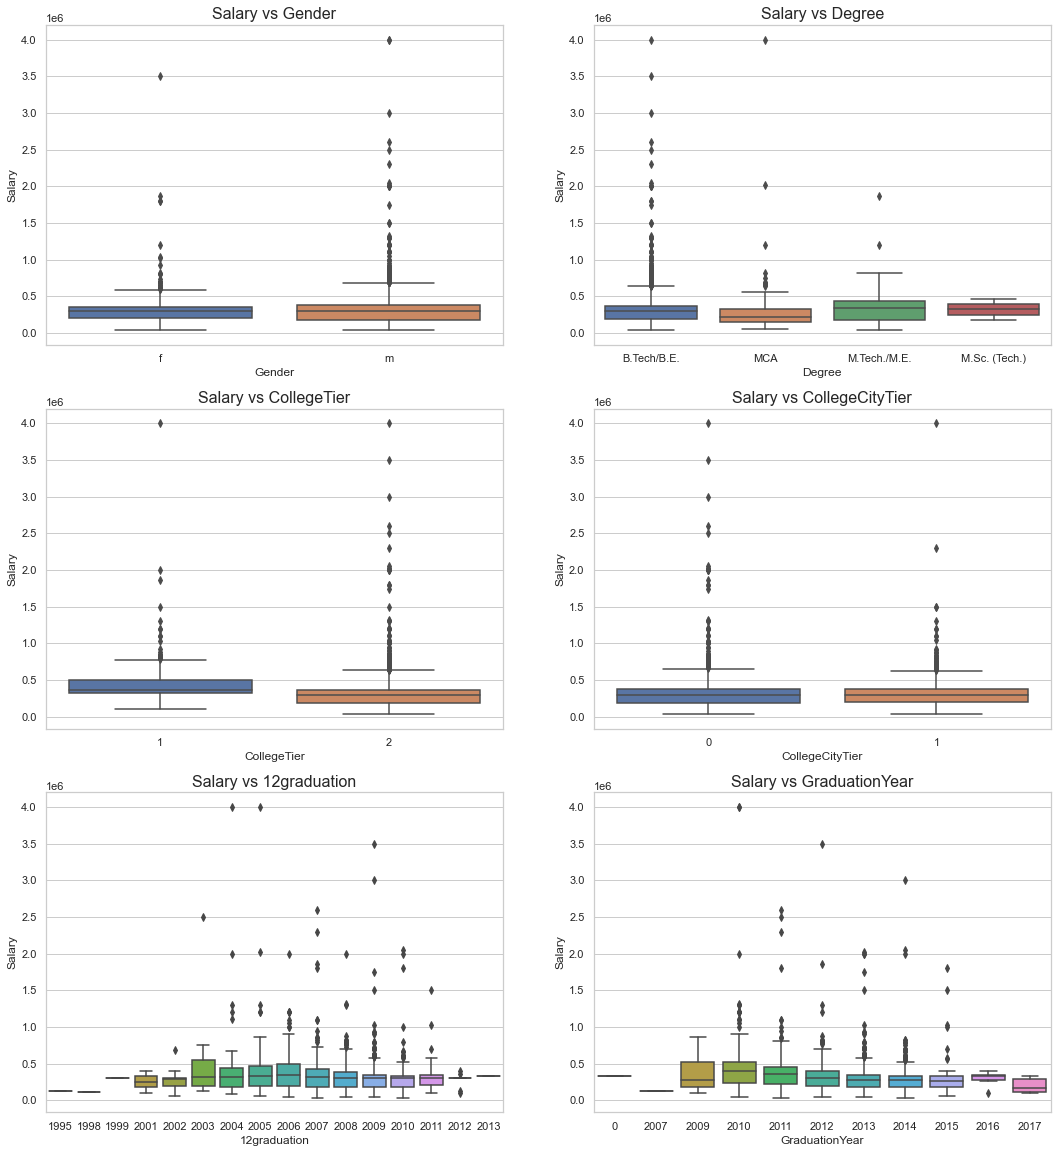

In [17]:
attributes = ['Gender','Degree','CollegeTier','CollegeCityTier','12graduation','GraduationYear']
sns.set_style('whitegrid')
fig , axes = plt.subplots(nrows = 3 , ncols = 2 , figsize = (18,20))

count = 0

for i in range(3):
    for j in range(2):
        sns.boxplot(data = df , y = 'Salary' , x = attributes[count], ax = axes[i,j])
        axes[i,j].set_title(f"Salary vs {attributes[count]}", fontsize=16)
        count += 1

**Observations :**

1) Salary vs Gender :

    * Salaries for Male and Female have the Same Salary Median Values.
    * Maximum Salary for Males seems to be higher than those for Females.
    * Male Salary have more Outliers than Female Salary.

2) Salary vs Degree :

    * Salaries for M.Tech and M.Sc(Tech) Students have the Same Salary Median Values.
    * B.Tech Degree have the highest number of Outliers than the rest of the Degrees.
    * Salary Range for M.Tech Students is greater than those of B.Tech Students.
    
3) Salary vs CollegeTier :

    * Salary Range for Tier 1 Colleges is greater than Tier 2 Colleges.
    * Tier 2 Colleges have more Outliers than Tier 1 Colleges.
    
4) Salary vs CollegeCityTier :

    * Salary Range for Tier 0 Cities is slightly greater than Tier 1 Cities.
    * Tier 0 Cities have more Outliers than Tier 1 Cities.
    * Salary for Tier 0 and Tier 1 College Cities have the same Salary Median Values.

5) Salary vs 12graduation :

    * Off all the years considered , Salary Range for the Year 2006 is the largest.
    * Salary Median Values for Years 2003 , 2004 , 2005 , 2007 , 2008 , 2009 , 2010 and 2011 are the Same.
    
6) Salary vs GraduationYear :

    * Off all the years considered , Salary Range for the Year 2010 is the largest.
    * Salary Median Values for Years 2009 , 2013 , 2014 and 2015 are the Same.

**Relations between AMCAT Scores wrt Salary**

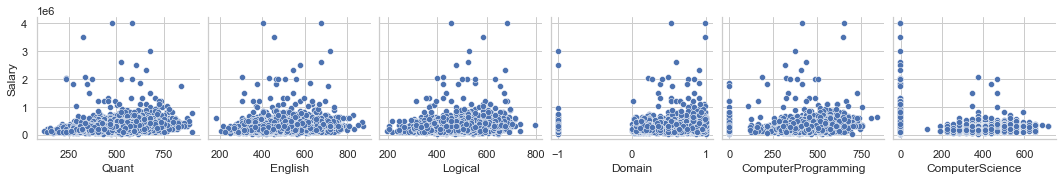

In [18]:
#sns.pairplot(vars=['Quant','English','Logical','Domain','ComputerProgramming','ComputerScience','Salary'],data=df)
sns.pairplot(df, x_vars=['Quant','English','Logical','Domain','ComputerProgramming','ComputerScience'],y_vars=['Salary'])

**Observations :**

1. Quant vs Salary
    
   * Most of the Quant Scores are lying between 0 and 1(e^6) values for Salaries.
   * Outliers are present beyond this Salary Range.
    
2. English vs Salary 

   * Most of the English Scores are lying between 0 and 1(e^6) values for Salaries.
   * Outliers are present beyond this Salary Range.

3. Logical vs Salary 
    * Most of the Logical Scores are lying between 0 and 1(e^6) values for Salaries.
    * Outliers are present beyond this Salary Range.
4. Domain vs Salary 
     * Most of the Domain Scores are lying between 0 and 1(e^6) values for Salaries.
     * Outliers are present beyond this Salary Range. Also, Values of (-1) are an Outlier , where values weren't mentioned.
   
5. ComputerProgramming vs Salary 

    * Most of the ComputerProgramming Scores are lying between 0 and 1(e^6) values for Salaries.
    * Outliers are present beyond this Salary Range. Many outliers are present at ZERO Scores.
    
6. ComputerScience vs Salary 
    * Most of the ComputerProgramming Scores are lying between 0 and 1(e^6) values for Salaries.
    * Outliers are present beyond this Salary Range. Many outliers are present at ZERO Scores.


In [19]:
df.corr().round(2)

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Salary,1.00,0.18,-0.16,0.17,-0.12,-0.18,0.13,-0.12,0.02,-0.01,0.18,0.18,0.23,0.10,0.12,0.00,-0.10,0.02,-0.05,-0.02,0.04,-0.06,0.06,-0.01,-0.05,-0.01
10percentage,0.18,1.00,0.27,0.64,0.02,-0.13,0.31,0.02,0.12,-0.01,0.35,0.32,0.32,0.08,0.05,0.09,-0.02,0.05,0.07,0.05,0.03,0.07,0.14,-0.00,-0.13,0.04
12graduation,-0.16,0.27,1.00,0.26,0.25,0.03,0.09,0.25,-0.00,0.01,0.15,0.11,0.00,-0.03,-0.05,-0.01,0.29,0.04,0.12,0.02,-0.00,0.10,0.04,0.06,-0.07,-0.02
12percentage,0.17,0.64,0.26,1.00,0.02,-0.10,0.35,0.02,0.13,-0.01,0.21,0.24,0.31,0.07,0.08,0.12,-0.04,0.04,0.06,0.04,0.01,0.06,0.10,-0.01,-0.09,0.01
CollegeID,-0.12,0.02,0.25,0.02,1.00,0.07,0.02,1.00,0.01,-0.00,-0.02,-0.05,-0.11,-0.07,-0.03,-0.02,0.10,-0.01,0.02,0.03,0.01,0.08,-0.01,0.01,-0.01,-0.01
CollegeTier,-0.18,-0.13,0.03,-0.10,0.07,1.00,-0.09,0.07,-0.10,-0.01,-0.18,-0.18,-0.25,-0.06,-0.07,-0.03,0.00,-0.02,0.00,0.00,-0.03,0.06,-0.04,0.01,0.02,-0.02
collegeGPA,0.13,0.31,0.09,0.35,0.02,-0.09,1.00,0.02,0.02,0.01,0.11,0.20,0.22,0.11,0.14,0.03,0.01,-0.03,0.05,-0.01,-0.02,0.07,0.07,-0.03,-0.07,0.03
CollegeCityID,-0.12,0.02,0.25,0.02,1.00,0.07,0.02,1.00,0.01,-0.00,-0.02,-0.05,-0.11,-0.07,-0.03,-0.02,0.10,-0.01,0.02,0.03,0.01,0.08,-0.01,0.01,-0.01,-0.01
CollegeCityTier,0.02,0.12,-0.00,0.13,0.01,-0.10,0.02,0.01,1.00,0.01,0.05,0.02,0.01,0.01,0.06,0.04,-0.01,-0.05,0.01,0.05,-0.03,0.01,0.01,-0.01,0.00,-0.02
GraduationYear,-0.01,-0.01,0.01,-0.01,-0.00,-0.01,0.01,-0.00,0.01,1.00,-0.02,-0.02,-0.02,-0.01,0.03,0.01,0.02,-0.07,0.01,0.00,0.00,-0.01,-0.00,0.01,-0.00,0.02


<AxesSubplot:>

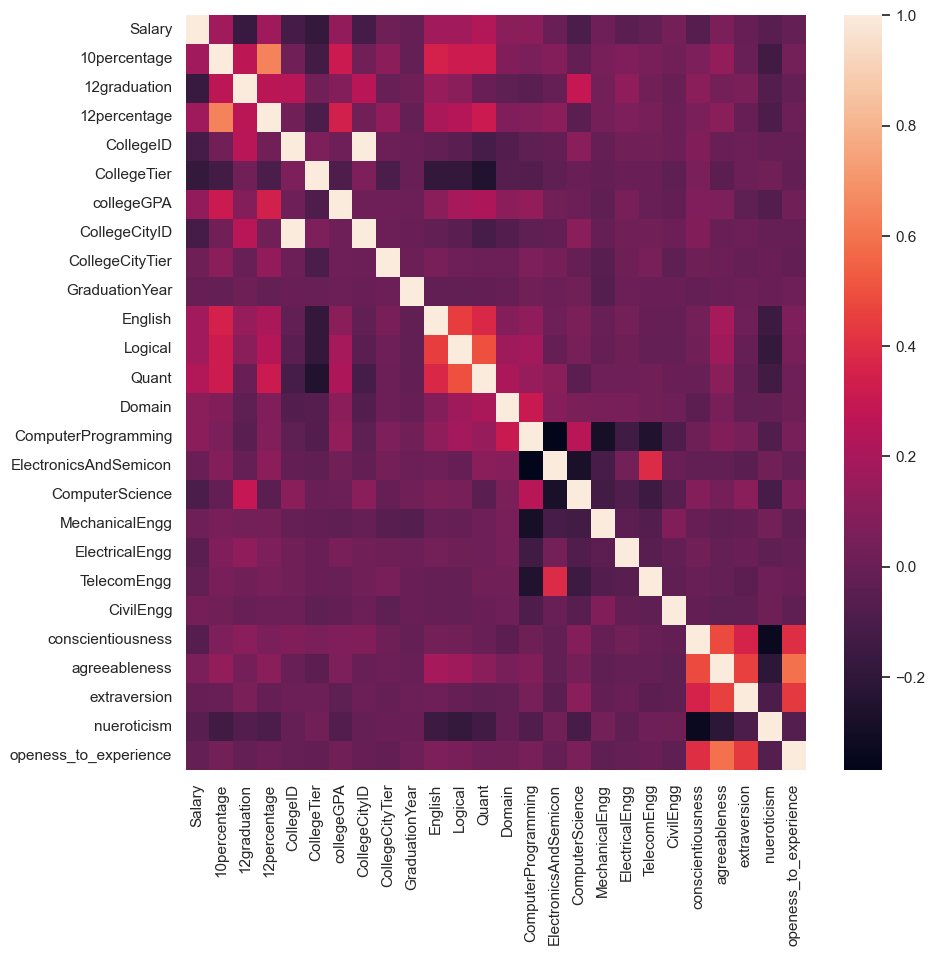

In [20]:
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(df.corr())

**Observations :**

1. CollegeGPA matters a bit less than 10th Percentage and 12th Percentage , when comparing it wrt Salary.
2. CollegeCityTier matters more in comparison to CollegeTier , when considering a Student's Salary.
3. Domain and ComputerProgramming have good correlation, considering Domain Section. This means that in Domain Test, Problems related to Computer Programming will be asked the most, besides Domain Questions.
4. Computer Science was also considered for 12th Graduation for a good part.


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **Relation between Gender and Specialization :**
- Relation between any 2 Categorical Columns can be found out using Chi Square Testing.

In [21]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [22]:
print(df['Gender'].value_counts())
print("-"*60)
print(df['Specialization'].value_counts())

m    3041
f     957
Name: Gender, dtype: int64
------------------------------------------------------------
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production e

In [23]:
# Observed freqency distribution

observed = pd.crosstab(df.Specialization, df.Gender)
observed

Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


In [24]:
# Chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
dr = chi2_contingency(observed)[2]

# Computing chi2 test statistic, p-value, degree of freedoms

print('test statistic :',chi2_contingency(observed)[0].round(3))
print('p value :',chi2_contingency(observed)[1])
print('degree of freedoms :',chi2_contingency(observed)[2])

test statistic : 104.469
p value : 1.2453868176977011e-06
degree of freedoms : 45


In [25]:
confidence_level = 0.95
alpha = 1 - confidence_level
chi2_critical = chi2.ppf(1 - alpha, dr)
chi2_critical.round(3)

61.656

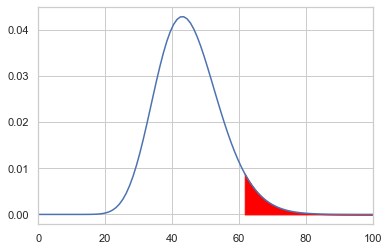

In [26]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum

x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, dr)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, dr)
plt.fill_between(x1, y1, color='red')

In [27]:
# Chi-square test 
print("H0 : Both gender and specialization are independent of each other.")
print("H1 : Both gender and specialization are dependent of each other.")
print("-"*80)
alpha=0.05
print("Alpha:" ,0.05)
t_test, p_value,dof = chi2_contingency(observed)[0],chi2_contingency(observed)[1],chi2_contingency(observed)[2]
print("Test Statistic: ",t_test.round(3))
print("P value: ",p_value)
print("Degree of Freedom: ",dof)

print("-"*80)
if p_value > alpha:
    print("Conclusion: Since p-value {} is greater than alpha {} ". format (p_value,alpha) )
    print("WE fail to reject the null hypothesis ie, Both gender and specialization are independent of each other.")
else:
    print("Conclusion: Since p-value {} is less than alpha {} ". format (p_value,alpha) )
    print("WE reject the null hypothesis ie, Both gender and specialization are dependent of each other.")

H0 : Both gender and specialization are independent of each other.
H1 : Both gender and specialization are dependent of each other.
--------------------------------------------------------------------------------
Alpha: 0.05
Test Statistic:  104.469
P value:  1.2453868176977011e-06
Degree of Freedom:  45
--------------------------------------------------------------------------------
Conclusion: Since p-value 1.2453868176977011e-06 is less than alpha 0.05 
WE reject the null hypothesis ie, Both gender and specialization are dependent of each other.


**Observations :**

With 95% Confidence , we can say that both gender and preference of specialization are dependent of each other.

In [28]:
specialization_map = {'electronics and communication engineering' : 'ECE',
 'computer science & engineering' : 'CSE',
 'information technology' : 'CSE' ,
 'computer engineering' : 'CSE',
 'computer application' : 'CSE',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'ECE',
 'electronics & telecommunications' : 'ECE',
 'electrical engineering' : 'EEE',
 'electronics & instrumentation eng' : 'ECE',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'ECE',
 'information science engineering' : 'CSE',
 'instrumentation and control engineering' : 'ECE',
 'electronics engineering' : 'ECE',
 'biotechnology' : 'Other',
 'other' : 'Other',
 'industrial & production engineering' : 'Other','chemical engineering' : 'Other',
 'applied electronics and instrumentation' : 'ECE',
 'computer science and technology' : 'CSE',
 'telecommunication engineering' : 'ECE',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'ECE',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CSE',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CSE',
 'metallurgical engineering' : 'Other',
 'biomedical engineering' : 'Other',
 'industrial engineering' : 'Other',
 'information & communication technology' : 'ECE',
 'electrical and power engineering' : 'EEE',
 'industrial & management engineering' : 'Other',
 'computer networking' : 'CSE',
 'embedded systems technology' : 'ECE','power systems and automation' : 'EEE',
 'computer and communication engineering' : 'CSE',
 'information science' : 'CSE',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'Other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'ECE',
 'polymer technology' : 'Other',
 'electronics' : 'ECE'}

df['Specialization'] = df['Specialization'].map(specialization_map)
df['Specialization'].value_counts()

CSE      2289
ECE      1319
ME        220
EEE        85
Other      56
CE         29
Name: Specialization, dtype: int64

 **Observations :**

1. A total of 2289 Students are from Computer Science Specialization.
2. A total of 1319 Students are from Electronics Specialization.
3. A total of 220 Students are from Mechanical Specialization.
4. A total of 85 Students are from Electrical Specialization.
5. A total of 56 Stundets are from Other Specializations.
6. A total of 29 Students are from Civil Engineering Specializations.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Times of India article dated Jan 18, 2019 states that,

> ## **“After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”** 
- We need to test this claim from the data given.


In [29]:
df[['Salary',  'Specialization']].groupby( 'Specialization').describe().round(2)

Salary                                                      \
                 count       mean        std       min       25%       50%   
Specialization                                                               
CE                29.0  381206.90  190528.66  110000.0  295000.0  320000.0   
CSE             2289.0  312020.53  226690.84   35000.0  180000.0  300000.0   
ECE             1319.0  298798.33  189421.43   40000.0  190000.0  300000.0   
EEE               85.0  289529.41  213651.12   40000.0  180000.0  265000.0   
ME               220.0  310836.36  206893.22   60000.0  180000.0  267500.0   
Other             56.0  317946.43  162941.08  100000.0  180000.0  317500.0   

                                     
                     75%        max  
Specialization                       
CE              415000.0   800000.0  
CSE             385000.0  4000000.0  
ECE             350000.0  3000000.0  
EEE             340000.0  1860000.0  
ME              391250.0  1300000.0  
Other           400000.0   730000.0

<AxesSubplot:xlabel='Salary', ylabel='Specialization'>

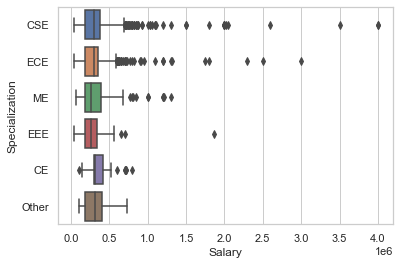

In [32]:
sns.boxplot(data = df , y = 'Specialization' , x = 'Salary')

**Observations :**

Yes , its definitely possible for a Candidate with Computer Science Engineering to earn upto 2.5-3 lakhs as a fresh graduate, since the Entire Range for Salary for CS Students lie between 0 and around 7,00,000. Also, a lot of Outliers are present for Salaries for CS Students too.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **What factors (such as degree, specialization) affect the higher salaries for candidates in this dataset?**


**SPECIALIZATION**

In [57]:
from scipy.stats import kruskal
import scipy.stats as stats
new_df = df[['Salary', 'Quant', 'English', 'Logical','Designation', 'JobCity', 'Gender', 'Specialization', 'Degree']]
new_df.head()
specs = new_df['Specialization'].unique()
results = []

for spec in specs:
    subset = new_df[new_df['Specialization'] == spec]['Salary']
    if len(subset.unique()) > 1:
        result = stats.kruskal(*subset)
        results.append((spec, result.statistic.round(4), result.pvalue.round(3)))

# Print the results
print("H0:There is no significant difference in salaries between the different engineering specializations.")
print("H1:There is significant difference in salaries between the different engineering specializations.")
print("-"*100)
print("Results of Kruskal-Wallis test:")
print("{:<40} {:<20} {:<20}".format("Specialization", "Test Statistic", "P-value"))
for r in results:
    print("{:<40} {:<20} {:<20}".format(r[0], r[1], r[2]))
alpha=0.05
print("-"*80)
print("Since p-values are greater than alpha (0.05), We reject the null hypothesis")    
print("Conclusion: Both salary and specialization are dependent on each other.")


H0:There is no significant difference in salaries between the different engineering specializations.
H1:There is significant difference in salaries between the different engineering specializations.
----------------------------------------------------------------------------------------------------
Results of Kruskal-Wallis test:
Specialization                           Test Statistic       P-value             
CSE                                      2288.0               0.496               
ECE                                      1318.0               0.495               
ME                                       219.0                0.487               
EEE                                      84.0                 0.479               
CE                                       28.0                 0.464               
Other                                    55.0                 0.475               
--------------------------------------------------------------------------------
Since 

**Observations :**
* Looking at the results, we can conclude that there is significant difference in salaries between the different engineering specializations.

**DEGREE**

In [56]:
# Create a list of all unique degrees
degrees = new_df['Degree'].unique()

# Initialize an empty list to store results
results = []

# Loop through all degrees and perform Kruskal-Wallis test
for degree in degrees:
    subset = new_df[new_df['Degree'] == degree]['Salary']
    result = kruskal(*subset)
    results.append((degree, result.statistic.round(4), result.pvalue.round(3)))

# Print the results

print("H0:There is no significant difference in salaries between different degree categories ")
print("H1:There is significant difference in salaries between different degree categories ")
print("-"*100)
print("Results of Kruskal-Wallis test:")
print("{:<40} {:<20} {:<20}".format("Degree", "Test Statistic", "P-value"))
for r in results:
    print("{:<40} {:<20} {:<20}".format(r[0], r[1], r[2]))
print("-"*80)
print("Since p-values are greater than alpha (0.05), We reject the null hypothesis")    
print("Conclusion: Both salary and degree are dependent on each other.")

H0:There is no significant difference in salaries between different degree categories 
H1:There is significant difference in salaries between different degree categories 
----------------------------------------------------------------------------------------------------
Results of Kruskal-Wallis test:
Degree                                   Test Statistic       P-value             
B.Tech/B.E.                              3699.0               0.497               
MCA                                      242.0                0.488               
M.Tech./M.E.                             52.0                 0.474               
M.Sc. (Tech.)                            1.0                  0.317               
--------------------------------------------------------------------------------
Since p-values are greater than alpha (0.05), We reject the null hypothesis
Conclusion: Both salary and degree are dependent on each other.


**Observations :**
* Looking at the results, we can conclude that there is significant difference in salaries between the different degree categories.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
## **Is there a significant difference in salary between candidates who have completed a master's degree versus those who only have a bachelor's degree?**

In [62]:
import scipy.stats as stats
import numpy as np
print("H0:There is significant difference in salaries between postgraduates and graduates")
print("H1:There is no significant difference in salaries between postgraduates and graduates")
print("-"*100)
bachelor_subset = new_df[new_df['Degree'] == 'B.Tech/B.E.']['Salary']
master_subset = new_df[new_df['Degree'] == 'M.Tech./M.E.']['Salary']

if len(bachelor_subset) > 1 and len(master_subset) > 1:
    result = stats.f_oneway(bachelor_subset.values, master_subset.values)
    print("Test statistic: {:.3f}".format(result.statistic))
    print("P-value: {:.3f}".format(result.pvalue))
else:
    print("Insufficient data to perform ANOVA")
print("-"*100)
print("Since p-value is less than alpha (0.05), We fail to reject the null hypothesis")    
print("Conclusion: There is significant difference in salaries between postgraduates and graduates")

H0:There is significant difference in salaries between postgraduates and graduates
H1:There is no significant difference in salaries between postgraduates and graduates
----------------------------------------------------------------------------------------------------
Test statistic: 4.111
P-value: 0.043
----------------------------------------------------------------------------------------------------
Since p-value is less than alpha (0.05), We fail to reject the null hypothesis
Conclusion: There is significant difference in salaries between postgraduates and graduates


**Observations :**
Since the p-value is less than 0.05,we can conclude that there is a statistically significant difference in salary between candidates who have completed a master's degree versus those who only have a bachelor's degree.

## **Are there any significant differences in salary or specialization preferences between different regions in India?**

In [71]:
from scipy.stats import ttest_ind

top_cities = ['Bangalore', 'Noida', 'Hyderabad', 'Pune', 'Chennai']
print("T-test results :")
for i in range(len(top_cities)):
    print("-"*60)
    for j in range(i+1, len(top_cities)):
        city1 = top_cities[i]
        city2 = top_cities[j]
        subset1 = new_df[new_df['JobCity'] == city1]['Salary']
        subset2 = new_df[new_df['JobCity'] == city2]['Salary']
        t, p = ttest_ind(subset1, subset2, equal_var=False)        
        print(f"for {city1} vs {city2}: t = {t.round(3)}, p = {p.round(5)}")

T-test results :
------------------------------------------------------------
for Bangalore vs Noida: t = 4.232, p = 3e-05
for Bangalore vs Hyderabad: t = 3.656, p = 0.00027
for Bangalore vs Pune: t = 1.083, p = 0.27943
for Bangalore vs Chennai: t = 5.876, p = 0.0
------------------------------------------------------------
for Noida vs Hyderabad: t = -0.788, p = 0.43092
for Noida vs Pune: t = -2.057, p = 0.04018
for Noida vs Chennai: t = 0.52, p = 0.60302
------------------------------------------------------------
for Hyderabad vs Pune: t = -1.501, p = 0.13409
for Hyderabad vs Chennai: t = 1.505, p = 0.13293
------------------------------------------------------------
for Pune vs Chennai: t = 2.679, p = 0.00766
------------------------------------------------------------


**Observations :**
* The t-test comparing Bangalore with Noida, Hyderabad, and Chennai all have p-values less than 0.05, indicating that the differences in salaries and specialization preferences between these cities are statistically significant. 
* The t-test comparing Noida with Pune has a p-value less than 0.05, indicating a statistically significant difference in salary and specialization preferences between these cities.

* The t-test comparing Bangalore with Pune has a p-value greater than 0.05, indicating that there is not a statistically significant difference in salary and specialization preferences between these two cities.

Conclusion : **There are significant differences in salary and specialization preferences between different cities in India.**

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
## **Insights :**

 1. Majority of the Students are Males(3041) and the rest 957 are Females considered for this DataSet (76% Students are Males. 24% Students are Females).
 2. Male to Female Ratio = 3.18
 3. Maximum Number of Students got around 88% in Class 10th and 70% in Class 12th.
 4. Maximum Number of Students graduated from Class 12th between Mid 2007 and 2010.
 5. Majority of the Colleges have Tier = 2 (3701). Rest of them have Tier = 1 (297). 
 6. Majority of the Cities(where colleges are present) have Tier = 0 (2797). Rest of them have Tier = 1 (1201).
 7. 26% Students completed their 12th class in Year 2009 (Maximum) and 0.025% Students completed their 12th class in Year 1995 , 1998 and 1999 (Minimum)
 8. 92% Students have considered B.Tech/B.E. as their Graduation Option (Maximum) and  0.05% Students opted for M.Sc. (Tech.) (Minimum).

9. Salary vs Gender :
         * Salaries for Male and Female have the Same Salary Median Values.
         * Maximum Salary for Males seems to be higher than those for Females.
         * Male Salary have more Outliers than Female Salary.
10. Salary vs Degree :
         * Salaries for M.Tech and M.Sc(Tech) Students have the Same Salary Median Values.
         * B.Tech Degree have the highest number of Outliers than the rest of the Degrees.
         * Salary Range for M.Tech Students is greater than those of B.Tech Students.   
11. Salary vs CollegeTier :
        * Salary Range for Tier 1 Colleges is greater than Tier 2 Colleges.
        * Tier 2 Colleges have more Outliers than Tier 1 Colleges.
12. Salary vs CollegeCityTier :
        * Salary Range for Tier 0 Cities is slightly greater than Tier 1 Cities.
        * Tier 0 Cities have more Outliers than Tier 1 Cities.
        * Salary for Tier 0 and Tier 1 College Cities have the same Salary Median Values.
13. Salary vs 12graduation :
        * Off all the years considered , Salary Range for the Year 2006 is the largest.
        * Salary Median Values for Years 2003 , 2004 , 2005 , 2007 , 2008 , 2009 , 2010 and 2011 are the Same.
14. Salary vs GraduationYear :
        * Off all the years considered , Salary Range for the Year 2010 is the largest.
        * Salary Median Values for Years 2009 , 2013 , 2014 and 2015 are the Same.
15. CollegeGPA matters a bit less than 10th Percentage and 12th Percentage , when comparing it wrt Salary.
16. CollegeCityTier matters more in comparison to CollegeTier , when considering a Student's Salary.
17. Domain and ComputerProgramming have good correlation, considering Domain Section. This means that in Domain Test, Problems related to Computer Programming will be asked the most, besides Domain Questions.
18. Computer Science was also considered for 12th Graduation for a good part.
19. A total of 2289,1319,220,85,56,29 Students are from Computer Science , Electronics , Mechanical , Electrical , Other and Civil Specialization respectively.

### Research observations :

* **There is significant differences in salaries among the different specializations in the dataset.**
* **There is significant difference in salaries between the different degree categories.**
* **There is significant difference in salaries between postgraduates and graduates.**
* **There are significant differences in salary and specialization preferences between different cities in India.**

## **Recommendations :**

 1. Colleges should focus most on educating their Students with Computer Science , so as to get Good PLacements, since the count for maximum students belong to CS Specialization.
 2. As per Chi - Square Test done , Gender impacts Specialization , since majority of the Students chose CS and EC Specializations.
 3. Yes , its definitely possible for a Candidate with Computer Science Engineering to earn upto 2.5-3 lakhs as a fresh graduate, since the Entire Range for Salary for CS Students lie between 0 and around 7,00,000. Also, a lot of Outliers are present for Salaries for CS Students too.
